In [1]:
import pandas as pd
import numpy as np
import os

## Load Plant data 
**remove duplicate and null columns.**

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Capstone ppt.pptx',
 'Capstone_Mahindra_First_Choice.ipynb',
 'Customer_Data.xlsx',
 'Final_Invoice.csv',
 'JTD.csv',
 'Mahindra Capstone.pdf',
 'Plant_Master.xlsx',
 'README.md']

In [3]:
plant_full_data = pd.read_excel('Plant_Master.xlsx')

In [4]:
plant_full_data.head()

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka


In [5]:
plant_full_data.isnull().sum()

Plant                        0
Name 1                       0
Valuation Area               0
Customer no. - plant         0
Vendor number plant        436
Factory calendar             0
Name 2                       2
House number and street      2
PO Box                       1
Postal Code                  0
City                         0
Sales organization           5
State                        0
dtype: int64

In [6]:
plant_full_data.shape

(438, 13)

**Drop columns=['Vendor number plant', 'Valuation Area', 'Factory calendar', 'Name 2', 'House number and street', 'PO Box', 'Sales organization']**

In [7]:
plant = plant_full_data.drop(columns=['Vendor number plant', 'Valuation Area', 'Factory calendar', 'Name 2', 'House number and street', 'PO Box', 'Sales organization', 'Customer no. - plant'])

In [8]:
plant.shape

(438, 5)

In [9]:
plant.isnull().sum()

Plant          0
Name 1         0
Postal Code    0
City           0
State          0
dtype: int64

## Read Customer Data. 
**Remove Duplicate and Missing values columns**.

In [10]:
customer_full_data = pd.read_excel('Customer_Data.xlsx')

In [11]:
customer_full_data.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaT
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaT
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaT
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaT
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaT


In [12]:
customer_full_data.shape

(555338, 9)

In [13]:
customer_full_data.isnull().sum()

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

In [14]:
customer = customer_full_data.drop(columns = ['Marital Status', 'Occupation', 'Date of Birth', 'Death date', 'Business Partner'])

In [15]:
customer.dtypes

Customer No.     object
Partner Type    float64
Data Origin      object
Title           float64
dtype: object

In [16]:
customer.isnull().sum()

Customer No.        0
Partner Type       78
Data Origin       136
Title           46307
dtype: int64

**FIll Missing Values in Partner Type, Data Origin, Title columns with most_frequently used values.**

In [17]:
most_frequent_value = customer['Partner Type'].mode()
customer['Partner Type'] = customer['Partner Type'].fillna(most_frequent_value[0])

In [18]:
customer['Data Origin'] = customer['Data Origin'].fillna(customer['Data Origin'].mode()[0])

In [19]:
customer['Title'] = customer['Title'].fillna(customer['Title'].mode()[0])

In [20]:
customer.isnull().sum()

Customer No.    0
Partner Type    0
Data Origin     0
Title           0
dtype: int64

## Load Invoice Data
Handle missing, duplicate data

In [21]:
invoice_full_data = pd.read_csv('Final_Invoice.csv',error_bad_lines=False,index_col=0)

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
invoice_full_data.head()

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,...,Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,...,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,...,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,...,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,...,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,...,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [23]:
invoice_full_data.shape

(492314, 58)

In [24]:
invoice_full_data[invoice_full_data['Customer No.']=='E14006']

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,...,Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
596342,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Nashik,NaN,NaN,...,NaN,0.0,VILAS,3224.98,0.0,0.0,0.0,0.0,3224.98,BC03SA2
655477,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Nashik,NaN,NaN,...,NaN,0.0,NaN,420.09,0.0,0.0,0.0,0.0,420.09,GOLIVE
671744,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Nashik,NaN,NaN,...,NaN,0.0,NaN,1637.43,0.0,0.0,0.0,0.0,1637.43,BC03SA3
698201,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Nashik,NaN,NaN,...,NaN,0.0,CX,1803.27,0.0,0.0,0.0,0.0,1803.27,BC03SA3


In [25]:
columns_to_be_removed = invoice_full_data.isnull().sum()[invoice_full_data.isnull().sum().sort_values() > 29178].index

In [26]:
invoice = invoice_full_data.drop(columns=columns_to_be_removed)

In [27]:
invoice.shape

(492314, 28)

In [28]:
invoice.head(5)

,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,...,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID
0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,...,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,4051.95,BC01FS1
1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,...,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,1001.29,BC01SA2
2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,...,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,233.14,BC01SA2
3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,...,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,0.00,BC01SA2
4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,...,Paid Service,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,2747.12,BC01SA2


In [29]:
columns_irrelevant = ['Area / Locality', 'Print Status', 'Gate Pass Time', 'Recovrbl Exp']

In [30]:
invoice = invoice.drop(columns=columns_irrelevant)

In [31]:
invoice.dropna(subset=['Regn No'], inplace=True)

In [32]:
invoice.isnull().sum().sort_values()

Labour Total             0
Regn No                  0
Plant Name1              0
Plant                    0
Pin code                 0
Parts Total              0
Order Type               0
OSL Total                0
Misc Total               0
Make                     0
Total Amt Wtd Tax.       0
User ID                  0
JobCard Time             0
JobCard Date             0
Job Card No              0
Invoice Time             0
Invoice No               0
Invoice Date             0
District                 0
Customer No.             0
Cust Type                0
KMs Reading              0
CITY                     1
Model                 1524
dtype: int64

In [33]:
invoice['Cust Type'] = invoice['Cust Type'].fillna(invoice['Cust Type'].mode()[0])
invoice['CITY'] = invoice['CITY'].fillna(invoice['CITY'].mode()[0])
invoice['Model']  = invoice['Model'].fillna(invoice['Model'].mode()[0])

In [34]:
invoice.isnull().sum().sort_values()

CITY                  0
Regn No               0
Plant Name1           0
Plant                 0
Pin code              0
Parts Total           0
Order Type            0
OSL Total             0
Model                 0
Misc Total            0
Make                  0
Labour Total          0
KMs Reading           0
JobCard Time          0
JobCard Date          0
Job Card No           0
Invoice Time          0
Invoice No            0
Invoice Date          0
District              0
Customer No.          0
Cust Type             0
Total Amt Wtd Tax.    0
User ID               0
dtype: int64

In [35]:
invoice['Order Type'].value_counts()

Running Repairs      269448
Paid Service         134995
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
WBW Order                17
Workshop Damage          17
Name: Order Type, dtype: int64

## Read JTD data
* Handle missing and duplicate data.

In [36]:
jtd = pd.read_csv('JTD.csv', index_col=0)

D:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [37]:
jtd.shape

(5619484, 9)

In [38]:
jtd[jtd['DBM Order']==98050]

,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
2674242,98050,10,1EMJ96615412,NaN,SWITCH A-A/C CONTROL,P002,1.0,EA,5185.92
2674243,98050,20,1EMJ96548238,NaN,WEATHER STRIP A-REAR DOOR LH,P002,1.0,EA,1433.49
2674244,98050,30,1EMJ96548102,NaN,WEATHER STRIP A-FRONT DOOR LH,P002,1.0,EA,1526.88
2674245,98050,40,1EMJ96548239,NaN,WEATHER STRIP A-REAR DOOR RH,P002,1.0,EA,1433.49
2674246,98050,50,1EMJ96548103,NaN,WEATHER STRIP A-FRONT DOOR RH,P002,1.0,EA,1526.88


In [39]:
len(jtd['Order Quantity'].unique())

3604

In [40]:
jtd_grouped = jtd.groupby('DBM Order')['Description','Item Category','Order Quantity','Net value'].agg(Description=('Description', lambda x: str(set(x)).strip('{}').replace("'","")),
    Item_Category=('Item Category', lambda x: str(set(x)).strip('{}').replace("'","")),Order_Quantity=('Order Quantity',sum),Net_Value=('Net value',sum)).reset_index()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [41]:
jtd_grouped.head()

,DBM Order,Description,Item_Category,Order_Quantity,Net_Value
0,4,"SPARK PLUG, KIT-ENGINE UPR REPAIRED SEAL, AFTE...","P011, P010, P001, P002",731.6,16998.49
1,5,"MISC LABOR 0.5 HOURS, Paid Service-Major, SHEL...","P002, P001",290.2,3779.80
2,6,"MISC LABOR 0.5 HOURS, REPLACE STARTER MOTOR AS...",P001,109.0,1340.37
3,7,MISC LABOR 0.25 HOURS,P001,36.5,167.36
4,8,"ELF Synthetic Engine OIL, REPLACE ENGINE OIL &...","P002, P001",69.0,2306.94


In [42]:
jtd_grouped.shape

(973473, 5)

In [43]:
jtd['Description'].value_counts().head(50)

MISC_OTHER CHARGES                        270563
Paid Service-Minor                        201857
WASHING                                   199068
Wheel Alignment                           191211
OIL FILTER                                154387
URANIA SUPREMO CI 4 15W 40                122218
MFC PROLEUM CI4/SL 15W40                   92091
AIR FILTER                                 80211
Wheel Balancing (5 Wheels)                 79970
MISC LABOR 0.5 HOURS                       62982
General Check up                           62459
Paid Service-Major                         60369
WINDSHIELD LIQUID WASHER                   55352
MISC LABOR 0.25 HOURS                      50143
DISTILLED WATER                            46919
Interior & Upholstery Cleaning             44864
REPLACE BRAKE PAD (BOTH SIDE)              38552
PAINTING CHARGES                           34187
MISC LABOR 1 HOUR                          33993
BALANCE WEIGHT 15GRAM                      31791
MISC LABOR 2 HOURS  

In [44]:
jtd.shape

(5619484, 9)

In [45]:
jtd.isnull().sum().sort_values()

DBM Order                    0
Order Item                   0
Item Category                0
Order Quantity               0
Net value                    0
Material                 51629
Description              51629
Target quantity UoM      51629
Labor Value Number     3774033
dtype: int64

## Merge the Data
**Merge Invoice and Customer Data on Customer No. Key**

In [46]:
invoice['Customer No.'] = invoice['Customer No.'].str.lstrip('0')

In [47]:
customer['Customer No.'] = customer['Customer No.'].astype(str)

In [48]:
invoice_customer = pd.merge(invoice, customer, on='Customer No.')

In [49]:
invoice_customer.shape, len(invoice['Customer No.'].unique()), len(customer['Customer No.'].unique()), len(invoice_customer['Customer No.'].unique())

((492296, 27), 253480, 555338, 253478)

In [50]:
invoice_customer.isnull().sum()

CITY                  0
Cust Type             0
Customer No.          0
District              0
Invoice Date          0
Invoice No            0
Invoice Time          0
Job Card No           0
JobCard Date          0
JobCard Time          0
KMs Reading           0
Labour Total          0
Make                  0
Misc Total            0
Model                 0
OSL Total             0
Order Type            0
Parts Total           0
Pin code              0
Plant                 0
Plant Name1           0
Regn No               0
Total Amt Wtd Tax.    0
User ID               0
Partner Type          0
Data Origin           0
Title                 0
dtype: int64

**Merge invoice_customer and Plant**

In [51]:
plant.shape

(438, 5)

In [52]:
len(invoice_customer.Plant.unique()), len(plant.Plant.unique())

(242, 438)

In [53]:
invoice_customer_plant = pd.merge(invoice_customer, plant, on='Plant')

In [54]:
invoice_customer_plant.shape

(255754, 31)

In [55]:
invoice_customer_plant.isnull().sum()

CITY                  0
Cust Type             0
Customer No.          0
District              0
Invoice Date          0
Invoice No            0
Invoice Time          0
Job Card No           0
JobCard Date          0
JobCard Time          0
KMs Reading           0
Labour Total          0
Make                  0
Misc Total            0
Model                 0
OSL Total             0
Order Type            0
Parts Total           0
Pin code              0
Plant                 0
Plant Name1           0
Regn No               0
Total Amt Wtd Tax.    0
User ID               0
Partner Type          0
Data Origin           0
Title                 0
Name 1                0
Postal Code           0
City                  0
State                 0
dtype: int64

## Prepare Data for Clustering after cleaning merged data

In [56]:
invoice_customer_plant.head()

,CITY,Cust Type,Customer No.,District,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,...,Regn No,Total Amt Wtd Tax.,User ID,Partner Type,Data Origin,Title,Name 1,Postal Code,City,State
0,THANE,Retail,80479,Maharashtra,2015-06-19,7151201169,18:10:34,227460,2015-06-19,13:56:32,...,MH03AB0789,2201.78,X006SA1,1.0,Z010,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra
1,Thane,Retail,E15810,Maharashtra,2016-07-20,7151205340,10:26:00,413455,2016-07-18,15:49:34,...,MH04CT295,6025.86,X006WM1,1.0,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra
2,Thane,Retail,E15810,Maharashtra,2016-09-04,7151205916,11:12:47,446448,2016-08-30,10:10:59,...,MH04CT295,3464.00,X006WM1,1.0,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra
3,NAVI MUMBAI,Retail,73857,Maharashtra,2016-10-28,7151206592,13:17:54,487708,2016-10-18,17:47:35,...,MH43AN1186,2065.75,X006SA1,1.0,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra
4,Thane,Retail,E25519,Maharashtra,2015-05-28,7151201014,18:20:37,220109,2015-05-28,17:57:40,...,MH04DN6210,653.45,X006SA1,1.0,Z001,2.0,X006 - A.M.MOTORS,401104,Thane,Maharashtra


In [57]:
invoice_customer_plant.shape

(255754, 31)

In [58]:
invoice_customer_plant.describe()

,Invoice No,Job Card No,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Pin code,Total Amt Wtd Tax.,Partner Type,Title,Postal Code
count,2.557540e+05,255754.000000,2.557540e+05,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000,255754.000000
mean,7.154316e+09,348892.072120,8.454848e+04,1647.134252,196.013643,147.131363,2315.776703,482079.179098,4306.055961,1.459883,1.961655,488208.955915
std,4.901045e+07,102284.060465,1.412618e+05,4858.893926,1877.049774,1502.267100,8192.674795,172344.322657,11677.718916,64.170792,0.192029,164193.412429
min,7.000000e+09,119.000000,1.000000e+00,-137.000000,-0.010000,0.000000,-0.010000,0.000000,-137.000000,1.000000,1.000000,123001.000000
25%,7.153601e+09,280215.750000,3.534250e+04,1.010000,0.000000,0.000000,0.000000,401107.000000,250.430000,1.000000,2.000000,410501.000000
50%,7.160202e+09,363786.500000,6.386600e+04,446.940000,0.000000,0.000000,108.285000,560067.000000,1161.540000,1.000000,2.000000,560037.000000
75%,7.175002e+09,431837.750000,1.001878e+05,1366.935000,0.000000,0.000000,2045.140000,608003.000000,4085.360000,1.000000,2.000000,610001.000000
max,7.241600e+09,499962.000000,9.999999e+06,323000.000000,350000.000000,88555.310000,598003.480000,999999.000000,648203.490000,9003.000000,2.000000,851134.000000


In [59]:
invoice_customer_plant.shape, invoice_customer_plant.columns

((255754, 31),
 Index(['CITY', 'Cust Type', 'Customer No.', 'District', 'Invoice Date',
        'Invoice No', 'Invoice Time', 'Job Card No', 'JobCard Date',
        'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
        'Model', 'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
        'Plant Name1', 'Regn No', 'Total Amt Wtd Tax.', 'User ID',
        'Partner Type', 'Data Origin', 'Title', 'Name 1', 'Postal Code', 'City',
        'State'],
       dtype='object'))

In [60]:
invoice_customer_plant['Invoice Date'] = pd.to_datetime(invoice_customer_plant['Invoice Date'])

In [61]:
invoice_customer_plant['Invoice Date Time'] = invoice_customer_plant['Invoice Date'].astype(str).str.cat(invoice_customer_plant[['Invoice Time']].astype(str),sep=' ')

In [62]:
invoice_customer_plant['JobCard Date'] =  pd.to_datetime(invoice_customer_plant['JobCard Date'])

In [63]:
invoice_customer_plant['JobCard Date Time'] = invoice_customer_plant['JobCard Date'].astype(str).str.cat(invoice_customer_plant[['JobCard Time']].astype(str), sep=' ')

In [64]:
invoice_customer_plant.loc[:, ['JobCard Date Time', 'JobCard Date','JobCard Time']].head()

,JobCard Date Time,JobCard Date,JobCard Time
0,2015-06-19 13:56:32,2015-06-19,13:56:32
1,2016-07-18 15:49:34,2016-07-18,15:49:34
2,2016-08-30 10:10:59,2016-08-30,10:10:59
3,2016-10-18 17:47:35,2016-10-18,17:47:35
4,2015-05-28 17:57:40,2015-05-28,17:57:40


In [65]:
invoice_customer_plant.loc[:, ['Invoice Date Time', 'Invoice Date','Invoice Time']].head()

,Invoice Date Time,Invoice Date,Invoice Time
0,2015-06-19 18:10:34,2015-06-19,18:10:34
1,2016-07-20 10:26:00,2016-07-20,10:26:00
2,2016-09-04 11:12:47,2016-09-04,11:12:47
3,2016-10-28 13:17:54,2016-10-28,13:17:54
4,2015-05-28 18:20:37,2015-05-28,18:20:37


In [66]:
invoice_customer_plant['Invoice Date Time'] = pd.to_datetime(invoice_customer_plant['Invoice Date Time'])

In [67]:
invoice_customer_plant['JobCard Date Time'] = pd.to_datetime(invoice_customer_plant['JobCard Date Time'])

In [68]:
invoice_customer_plant['ServiceTime'] = invoice_customer_plant['Invoice Date Time']-invoice_customer_plant['JobCard Date Time']

In [69]:
invoice_customer_plant.loc[:, ['ServiceTime']].head()

,ServiceTime
0,0 days 04:14:02
1,1 days 18:36:26
2,5 days 01:01:48
3,9 days 19:30:19
4,0 days 00:22:57


In [70]:
invoice_customer_plant.loc[:, ['ServiceTime']].describe()

,ServiceTime
count,255754
mean,4 days 06:36:08.553336405
std,12 days 18:05:19.842755954
min,-1 days +23:59:27
25%,0 days 01:54:30
50%,0 days 08:08:20.500000
75%,3 days 01:43:06.500000
max,495 days 03:25:24


In [71]:
invoice_customer_plant = invoice_customer_plant.loc[invoice_customer_plant['ServiceTime']>pd.Timedelta(hours=0),:]

In [72]:
invoice_customer_plant.loc[:, ['ServiceTime']].describe()

,ServiceTime
count,255753
mean,4 days 06:36:09.997704812
std,12 days 18:05:21.754925484
min,0 days 00:00:36
25%,0 days 01:54:30
50%,0 days 08:08:21
75%,3 days 01:43:08
max,495 days 03:25:24


In [73]:
invoice_customer_plant['ServiceTime_category']=None
invoice_customer_plant.loc[invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=13),'ServiceTime_category']='super_fast'
invoice_customer_plant.loc[(invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=13))&(invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=36)),'ServiceTime_category']='fast'
invoice_customer_plant.loc[(invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=36))&(invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=61)),'ServiceTime_category']='mid'
invoice_customer_plant.loc[(invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=61))&(invoice_customer_plant['ServiceTime']<pd.Timedelta(hours=84)),'ServiceTime_category']='slow'
invoice_customer_plant.loc[invoice_customer_plant['ServiceTime']>=pd.Timedelta(hours=84),'ServiceTime_category']='super_slow'

In [74]:
invoice_customer_plant.drop(columns=['Invoice Time', 'Invoice Date', 'Invoice No', 'JobCard Date', 'JobCard Time', 'KMs Reading', 'Make', 'Model', 'Pin code', 'Plant', 'Plant Name1', 'User ID', 'District', 'Name 1', 'Postal Code', 'CITY', 'State', 'Invoice Date Time', 'JobCard Date Time', 'ServiceTime'], inplace=True)

In [75]:
invoice_customer_plant.head()

,Cust Type,Customer No.,Job Card No,Labour Total,Misc Total,OSL Total,Order Type,Parts Total,Regn No,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,City,ServiceTime_category
0,Retail,80479,227460,1802.05,0.0,0.0,Paid Service,399.73,MH03AB0789,2201.78,1.0,Z010,2.0,Thane,super_fast
1,Retail,E15810,413455,2874.80,0.0,0.0,Running Repairs,3151.06,MH04CT295,6025.86,1.0,Z001,2.0,Thane,mid
2,Retail,E15810,446448,2799.96,0.0,0.0,Running Repairs,664.04,MH04CT295,3464.00,1.0,Z001,2.0,Thane,super_slow
3,Retail,73857,487708,554.95,0.0,0.0,Running Repairs,1510.80,MH43AN1186,2065.75,1.0,Z001,2.0,Thane,super_slow
4,Retail,E25519,220109,75.02,0.0,0.0,Running Repairs,578.43,MH04DN6210,653.45,1.0,Z001,2.0,Thane,super_fast


**Merge Jtd grouped and invoice_customer_vehicles_plant csv**

In [76]:
len(invoice_customer_plant['Job Card No'].unique()), len(jtd_grouped['DBM Order'].unique())

(253199, 973473)

In [77]:
invoice_customer_plant_jtd = pd.merge(invoice_customer_plant, jtd_grouped, left_on='Job Card No', right_on='DBM Order').drop('DBM Order', axis=1)

In [78]:
invoice_customer_plant_jtd.shape

(255714, 19)

In [79]:
invoice_customer_plant_jtd.head(5)

,Cust Type,Customer No.,Job Card No,Labour Total,Misc Total,OSL Total,Order Type,Parts Total,Regn No,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,City,ServiceTime_category,Description,Item_Category,Order_Quantity,Net_Value
0,Retail,80479,227460,1802.05,0.0,0.0,Paid Service,399.73,MH03AB0789,2201.78,1.0,Z010,2.0,Thane,super_fast,"REPLACE HEADLIGHT HOLDER (EACH), INSULATION TA...","P001, P002",45.5,2201.78
1,Retail,E15810,413455,2874.80,0.0,0.0,Running Repairs,3151.06,MH04CT295,6025.86,1.0,Z001,2.0,Thane,mid,"OIL FILTER-SPIN ON PETROL, CLIP, BRAKE PAD SWI...","P001, P002",202.5,6025.86
2,Retail,E15810,446448,2799.96,0.0,0.0,Running Repairs,664.04,MH04CT295,3464.00,1.0,Z001,2.0,Thane,super_slow,"MISC LABOR 0.5 HOURS, REPLACE CAMSHAFT OIL SEA...","P001, P002",189.0,3464.00
3,Retail,73857,487708,554.95,0.0,0.0,Running Repairs,1510.80,MH43AN1186,2065.75,1.0,Z001,2.0,Thane,super_slow,"Paid Service-Minor, OIL FILTER VENTO, MFC PROL...","P001, P002",7.0,2065.75
4,Retail,E25519,220109,75.02,0.0,0.0,Running Repairs,578.43,MH04DN6210,653.45,1.0,Z001,2.0,Thane,super_fast,"REMOVE & REFIT WIPER BLADE REAR, WIPER T, NOZZ...","P001, P002",13.0,653.45


In [80]:
aggregation_by_customer_no = {'Cust Type' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Labour Total':'sum',
                              'Misc Total':'sum',
                              'OSL Total':'sum',
                              'Order Type' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Parts Total' : 'sum',
                              'Total Amt Wtd Tax.' : 'sum',
                              'Partner Type': 'nunique',
                              'Data Origin' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Title' : 'nunique',
                              'City' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'ServiceTime_category' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Description' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Item_Category' : lambda x: str(set(x)).strip("{}").replace("'",""),
                              'Order_Quantity' : 'sum',
                              'Net_Value' : 'sum'}

In [81]:
invoice_grouped_data = invoice_customer_plant_jtd.groupby('Customer No.').agg(aggregation_by_customer_no).reset_index()

In [82]:
invoice_grouped_data.shape

(153785, 17)

In [83]:
invoice_grouped_data.head(5)

,Customer No.,Cust Type,Labour Total,Misc Total,OSL Total,Order Type,Parts Total,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,City,ServiceTime_category,Description,Item_Category,Order_Quantity,Net_Value
0,100001,Retail,3429.34,0.0,0.0,"Running Repairs, Accidental",834.41,4263.75,1,Z005,1,Pune,"super_slow, super_fast, mid","TIE CLIP, ARALDITE (13GM), M - SEAL / BOND TIT...","P001, P002, P002, P001, P001",1208.2,4263.75
1,100003,Retail,0.00,0.0,0.0,Accidental,0.00,0.00,1,Z005,1,Shirur,super_fast,nan,G2TX,0.0,0.00
2,100004,Retail,249.22,0.0,0.0,Running Repairs,0.00,249.22,1,Z005,1,Boripardhi,super_fast,WASHING,P001,84.0,249.22
3,100006,Retail,1223.71,0.0,0.0,Paid Service,0.00,1223.71,1,Z006,1,Abohar,mid,TOPUP A/C GAS,P001,288.0,1223.71
4,100007,Retail,11031.37,0.0,0.0,"Paid Service, Running Repairs",35257.27,46288.64,1,Z005,1,Tirupur,"fast, super_fast, mid","BLEEDING CLUTCH, BATTERY, BEARING-CLUTCH RELEA...","P001, P002, P001",478.0,46288.64


In [84]:
','.join(sorted([w.strip(' ') for w in invoice_grouped_data['Order Type'].iloc[50].split(',')]))


'Mechanical,Paid Service,Running Repairs'

In [85]:
invoice_grouped_data['Order Type'] = invoice_grouped_data['Order Type'].apply(lambda x: ','.join(sorted([w.strip(' ') for w in x.split(',')])))

In [86]:
freq_used_services = ['Running Repairs','Paid Service', 'Paid Service,Running Repairs', 'Accidental']

In [87]:
invoice_grouped_data['Order Type'] = invoice_grouped_data['Order Type'].apply(lambda order: 'Others' if order not in freq_used_services else order)

In [88]:
(invoice_grouped_data['Order Type'].value_counts()/len(invoice_grouped_data['Order Type']))*100

Running Repairs                 47.278993
Paid Service                    24.318367
Others                          13.859609
Paid Service,Running Repairs     9.044445
Accidental                       5.498586
Name: Order Type, dtype: float64

In [89]:
most_freq_data_origin = (invoice_grouped_data['Data Origin'].value_counts()/len(invoice_grouped_data['Data Origin'])).iloc[0:7].index

In [90]:
invoice_grouped_data['Data Origin'] = invoice_grouped_data['Data Origin'].apply(lambda x: 'Others' if x not in most_freq_data_origin else x)

In [91]:
(invoice_grouped_data['Data Origin'].value_counts()/len(invoice_grouped_data['Data Origin']))*100

Z006      24.837273
Z005      24.239035
Others    14.944240
Z001       9.709009
Z002       7.928602
Z019       6.643041
Z021       6.005787
Z004       5.693013
Name: Data Origin, dtype: float64

In [92]:
most_freq_service_type = ((invoice_grouped_data['ServiceTime_category'].value_counts()/len(invoice_grouped_data['ServiceTime_category']))*100).iloc[0:11]

In [93]:
invoice_grouped_data['ServiceTime_category'] = invoice_grouped_data['ServiceTime_category'].apply(lambda x: 'Others' if x not in most_freq_service_type else x )

In [94]:
((invoice_grouped_data['ServiceTime_category'].value_counts()/len(invoice_grouped_data['ServiceTime_category']))*100)

super_fast                      43.665507
super_slow                      17.587541
fast                             9.323406
Others                           6.568261
super_slow, super_fast           5.056410
mid                              5.002438
fast, super_fast                 3.923660
slow                             3.170660
super_fast, mid                  1.785610
super_slow, fast                 1.515102
super_slow, fast, super_fast     1.406509
super_fast, slow                 0.994895
Name: ServiceTime_category, dtype: float64

In [95]:
invoice_grouped_data.head(5)

,Customer No.,Cust Type,Labour Total,Misc Total,OSL Total,Order Type,Parts Total,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,City,ServiceTime_category,Description,Item_Category,Order_Quantity,Net_Value
0,100001,Retail,3429.34,0.0,0.0,Others,834.41,4263.75,1,Z005,1,Pune,Others,"TIE CLIP, ARALDITE (13GM), M - SEAL / BOND TIT...","P001, P002, P002, P001, P001",1208.2,4263.75
1,100003,Retail,0.00,0.0,0.0,Accidental,0.00,0.00,1,Z005,1,Shirur,super_fast,nan,G2TX,0.0,0.00
2,100004,Retail,249.22,0.0,0.0,Running Repairs,0.00,249.22,1,Z005,1,Boripardhi,super_fast,WASHING,P001,84.0,249.22
3,100006,Retail,1223.71,0.0,0.0,Paid Service,0.00,1223.71,1,Z006,1,Abohar,mid,TOPUP A/C GAS,P001,288.0,1223.71
4,100007,Retail,11031.37,0.0,0.0,"Paid Service,Running Repairs",35257.27,46288.64,1,Z005,1,Tirupur,Others,"BLEEDING CLUTCH, BATTERY, BEARING-CLUTCH RELEA...","P001, P002, P001",478.0,46288.64


In [96]:
invoice_grouped_data.drop(columns=['Description'], inplace=True)

In [97]:
most_freq_used_item_categ = ((invoice_grouped_data['Item_Category'].value_counts()/len(invoice_grouped_data['Item_Category']))*100).iloc[0:11].index

In [98]:
invoice_grouped_data['Item_Category'] = invoice_grouped_data['Item_Category'].apply(lambda x: 'Others' if x not in most_freq_used_item_categ else x)

In [99]:
invoice_grouped_data.head(5)

,Customer No.,Cust Type,Labour Total,Misc Total,OSL Total,Order Type,Parts Total,Total Amt Wtd Tax.,Partner Type,Data Origin,Title,City,ServiceTime_category,Item_Category,Order_Quantity,Net_Value
0,100001,Retail,3429.34,0.0,0.0,Others,834.41,4263.75,1,Z005,1,Pune,Others,Others,1208.2,4263.75
1,100003,Retail,0.00,0.0,0.0,Accidental,0.00,0.00,1,Z005,1,Shirur,super_fast,G2TX,0.0,0.00
2,100004,Retail,249.22,0.0,0.0,Running Repairs,0.00,249.22,1,Z005,1,Boripardhi,super_fast,P001,84.0,249.22
3,100006,Retail,1223.71,0.0,0.0,Paid Service,0.00,1223.71,1,Z006,1,Abohar,mid,P001,288.0,1223.71
4,100007,Retail,11031.37,0.0,0.0,"Paid Service,Running Repairs",35257.27,46288.64,1,Z005,1,Tirupur,Others,"P001, P002, P001",478.0,46288.64


**Apply Label Encoding on cluster data**

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le = LabelEncoder()

In [102]:
invoice_grouped_data_categroical = invoice_grouped_data[['Cust Type', 'Order Type',  'OSL Total', 'City', 'ServiceTime_category']]

In [103]:
invoice_grouped_data_categroical.head()

,Cust Type,Order Type,OSL Total,City,ServiceTime_category
0,Retail,Others,0.0,Pune,Others
1,Retail,Accidental,0.0,Shirur,super_fast
2,Retail,Running Repairs,0.0,Boripardhi,super_fast
3,Retail,Paid Service,0.0,Abohar,mid
4,Retail,"Paid Service,Running Repairs",0.0,Tirupur,Others


In [104]:
invoice_grouped_data_encoded = invoice_grouped_data_categroical.apply(le.fit_transform)

In [105]:
invoice_grouped_data_numerical = invoice_grouped_data[['Labour Total', 'Misc Total', 'Total Amt Wtd Tax.', 'Partner Type', 'Title']]

In [106]:
invoice_grouped_data_numerical = invoice_grouped_data.select_dtypes(include=[np.number])

In [107]:
cluster_data = pd.concat([invoice_grouped_data_encoded,invoice_grouped_data_numerical], axis=1)

In [108]:
cluster_data.head()

,Cust Type,Order Type,OSL Total,City,ServiceTime_category,Labour Total,Misc Total,OSL Total,Parts Total,Total Amt Wtd Tax.,Partner Type,Title,Order_Quantity,Net_Value
0,6,1,0,468,0,3429.34,0.0,0.0,834.41,4263.75,1,1,1208.2,4263.75
1,6,0,0,530,5,0.00,0.0,0.0,0.00,0.00,1,1,0.0,0.00
2,6,4,0,109,5,249.22,0.0,0.0,0.00,249.22,1,1,84.0,249.22
3,6,2,0,0,3,1223.71,0.0,0.0,0.00,1223.71,1,1,288.0,1223.71
4,6,3,0,612,0,11031.37,0.0,0.0,35257.27,46288.64,1,1,478.0,46288.64


In [109]:
cluster_data.shape

(153785, 14)

## Apply Clustering Algorthims

In [110]:
from sklearn.cluster import KMeans

In [111]:
dist=[]
# Iterate from 1-9
for i in range(1, 10):
    # Initialize KMeans algorithm
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    # Fit on data
    km.fit(cluster_data)
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)

In [112]:
import matplotlib.pyplot as plt

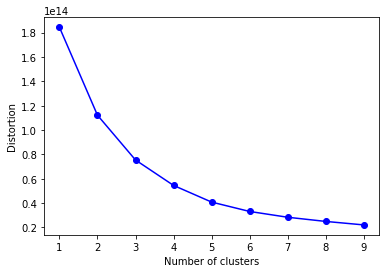

In [113]:
# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.plot(range(1, 10), dist, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [114]:
cluster  = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
# create 'cluster' column
cluster_data['Cluster'] = cluster.fit_predict(cluster_data)

In [115]:
# Cluster centers
centroids = cluster.cluster_centers_

In [116]:
# Within cluster sum of squares
wcss = km.inertia_

In [117]:
centroids

array([[5.99981079e+00, 2.93026962e+00, 5.25296074e+01, 3.29695033e+02,
        4.97318342e+00, 1.29280515e+03, 1.74544943e+02, 6.81395588e+01,
        1.51008767e+03, 3.04557732e+03, 1.00000000e+00, 1.00000000e+00,
        2.35624656e+02, 3.06870624e+03],
       [5.95000000e+00, 7.62500000e-01, 1.25139375e+03, 2.71106250e+02,
        6.00625000e+00, 7.21223099e+04, 1.06867459e+04, 1.06441803e+04,
        2.21509300e+05, 3.14962536e+05, 1.00000000e+00, 1.00000000e+00,
        1.40772054e+04, 3.61110499e+05],
       [5.99873799e+00, 1.67208862e+00, 5.02753698e+02, 3.06620627e+02,
        5.62567482e+00, 1.15518334e+04, 1.21412996e+03, 1.11501242e+03,
        1.60465059e+04, 2.99274817e+04, 1.00000000e+00, 1.00000000e+00,
        2.30296147e+03, 3.01526022e+04],
       [4.57142857e+00, 8.57142857e-01, 1.53842857e+03, 1.77285714e+02,
        1.42857143e+00, 4.70514554e+05, 1.01275394e+05, 1.35488614e+05,
        5.17366874e+05, 1.22464544e+06, 1.00000000e+00, 1.00000000e+00,
        1.567

In [118]:
wcss

22089915166233.8

In [119]:
cluster_data.head(10)

,Cust Type,Order Type,OSL Total,City,ServiceTime_category,Labour Total,Misc Total,OSL Total,Parts Total,Total Amt Wtd Tax.,Partner Type,Title,Order_Quantity,Net_Value,Cluster
0,6,1,0,468,0,3429.34,0.00,0.00,834.41,4263.75,1,1,1208.2,4263.75,0
1,6,0,0,530,5,0.00,0.00,0.00,0.00,0.00,1,1,0.0,0.00,0
2,6,4,0,109,5,249.22,0.00,0.00,0.00,249.22,1,1,84.0,249.22,0
3,6,2,0,0,3,1223.71,0.00,0.00,0.00,1223.71,1,1,288.0,1223.71,0
4,6,3,0,612,0,11031.37,0.00,0.00,35257.27,46288.64,1,1,478.0,46288.64,2
5,6,3,0,650,11,0.00,907.93,0.00,3532.61,4440.54,1,1,10.0,4440.54,0
6,6,4,0,553,5,199.40,0.00,0.00,0.00,199.40,1,1,15.0,199.40,0
7,6,0,2778,347,8,0.00,50.00,2950.28,0.00,3000.28,1,1,2.0,3000.28,0
8,6,4,0,530,5,310.56,0.00,0.00,0.00,310.56,1,1,30.0,310.56,0
9,6,3,0,43,11,14632.54,0.00,0.00,0.00,14632.54,1,1,528.0,14632.54,0


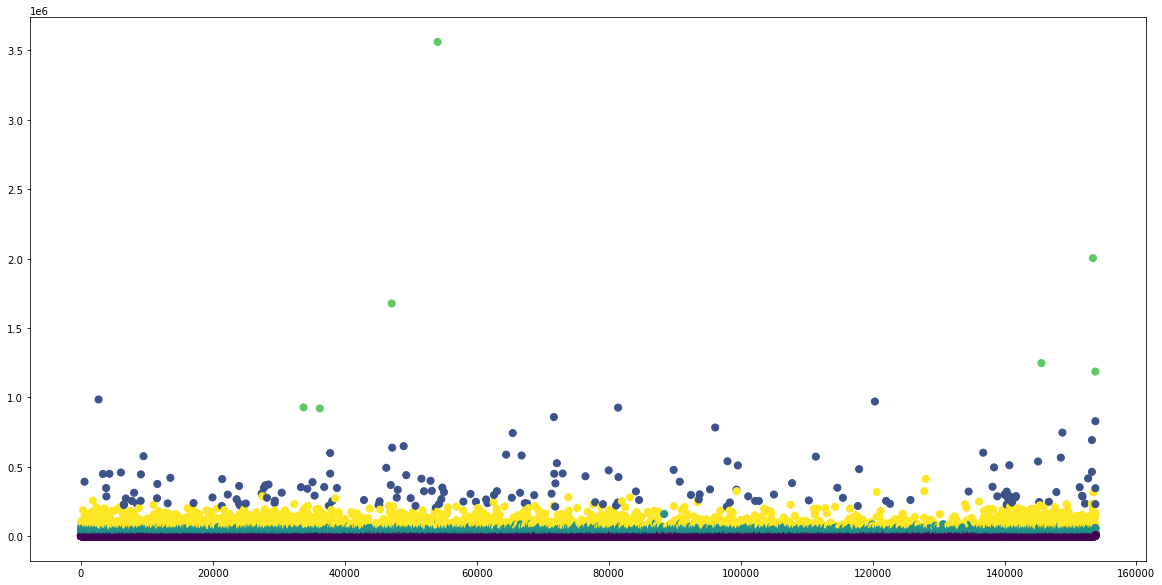

In [120]:
plt.figure(figsize=(20,10))
plt.scatter(cluster_data.index, cluster_data.iloc[:, 13], c=cluster_data['Cluster'], s=50, cmap='viridis')
plt.show()